In [20]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2)
circuit.x(0)

circuit.cx(0, 1)

circuit.measure([0, 1], [0, 1])

circuit.draw()

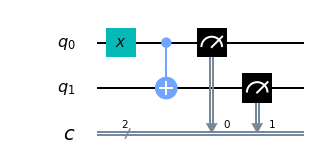

In [3]:
circuit.draw(output="mpl")

In [5]:
from qiskit import IBMQ

IBMQ.save_account(open("quantum/ibmtoken.txt", "r").read())

c:\users\ygoyal\appdata\local\programs\python\python37\lib\site-packages\qiskit\providers\ibmq\credentials\configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


In [6]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 0 queued and 5 qubits
ibmq_16_melbourne has 0 queued and 14 qubits
ibmq_vigo has 0 queued and 5 qubits
ibmq_ourense has 48 queued and 5 qubits
ibmq_london has 10 queued and 5 qubits
ibmq_burlington has 0 queued and 5 qubits
ibmq_essex has 2 queued and 5 qubits


In [23]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_16_melbourne") 
# backend = provider.get_backend("ibmq_qasm_simulator")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


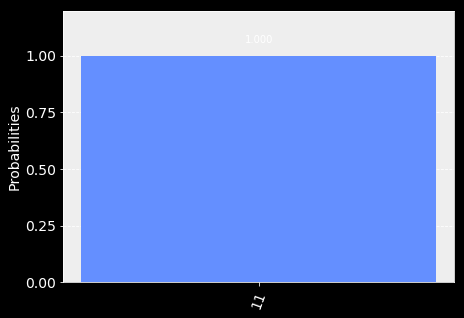

In [24]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [26]:
circuit = q.QuantumCircuit(2, 2)
circuit.h(0)

circuit.cx(0, 1)

circuit.measure([0, 1], [0, 1])

circuit.draw()

In [27]:
backend = provider.get_backend("ibmq_16_melbourne") 
# backend = provider.get_backend("ibmq_qasm_simulator")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


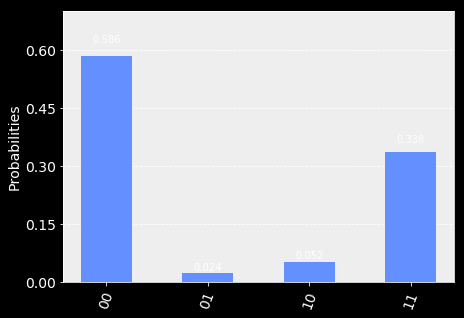

In [28]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [30]:
from qiskit import Aer

sim_be = Aer.get_backend("qasm_simulator")

for be in Aer.backends():
    print(be)

qasm_simulator
statevector_simulator
unitary_simulator


In [31]:
job = q.execute(circuit, backend=sim_be, shots=500)
job_monitor(job)

Job Status: job has successfully run


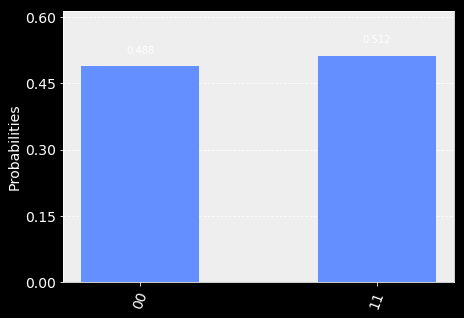

In [32]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])